In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.providers.aer import QasmSimulator
simulator = QasmSimulator()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Quantum lie detector

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.providers.aer import QasmSimulator
simulator = QasmSimulator()

hardy_circuit = QuantumCircuit(2)
hardy_circuit.initialize(np.array([1, 1, 1, 0])/np.sqrt(3))
hardy_circuit.measure_all()

def truth_lie(alice, bob) -> QuantumCircuit:
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(2, 'c')
    qc = QuantumCircuit(qr, cr)
    
    hardy_circuit.initialize(np.array([1, 0, 1, 1])/np.sqrt(3))
    
    if alice == "x": 
        qc.h(0)
    if bob == "x":
        qc.h(1)
    qc.measure(qr[0],cr[0])
    qc.measure(qr[1],cr[1])
    return qc

a = input("What basis does Alice measure in? Type z for z-basis, or x for x-basis.")
b = input("What basis does Bob measure in? Type z for z-basis, or x for x-basis.")

truth_lie = truth_lie(a,b)

truth_lie_job = simulator.run(truth_lie, shots=1000)
truth_lie_result = truth_lie_job.result()
truth_lie_counts = truth_lie_result.get_counts(truth_lie)

result = sorted(truth_lie_counts.keys())

guess = input("Which state will never occur?")

toggle = 0 

for i in range(len(result)):
    if result[i]== guess: 
        print("The statement was a LIE.")
        print("There is finite chance of the result:")
        print(guess)
        toggle = 1
        
if toggle == 0: 
    print("The statement was a TRUTH.")
    print("There is no chance of the result:")
    print(guess)

What basis does Alice measure in? Type z for z-basis, or x for x-basis. x
What basis does Bob measure in? Type z for z-basis, or x for x-basis. x
Which state will never occur? 10


The statement was a LIE.
There is finite chance of the result:
10


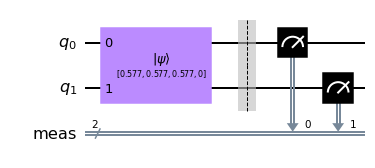

In [3]:
# Preparing the circuit

hardy_circuit = QuantumCircuit(2)
hardy_circuit.initialize(np.array([1, 1, 1, 0])/np.sqrt(3))
hardy_circuit.measure_all()

hardy_circuit.draw(output="mpl")

/tmp/ipykernel_59/1192045102.py:4: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeParis
/opt/conda/lib/python3.8/site-packages/qiskit_aer/noise/device/models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (78724.73839768364 > 2 * 17977.586136949183). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
/opt/conda/lib/python3.8/site-packages/qiskit_aer/noise/device/models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (151392.40575779957 > 2 * 69749.41874968237). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
/opt/conda

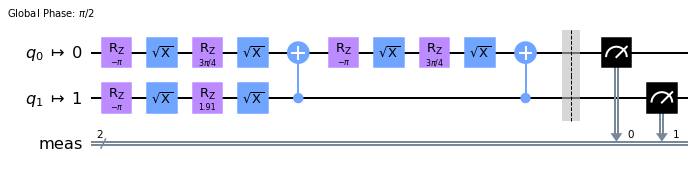

In [4]:
from qiskit import transpile

from qiskit.providers.aer import AerSimulator
from qiskit.test.mock import FakeParis

backend_sim = AerSimulator.from_backend(FakeParis())
transpile(hardy_circuit, backend_sim).draw(output='mpl', idle_wires=False)

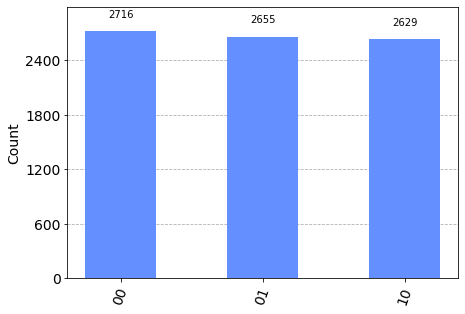

In [5]:
# Running the circuit 

from qiskit.providers.aer import QasmSimulator
simulator = QasmSimulator()

job = simulator.run(hardy_circuit, shots=8000)
result = job.result()
counts = result.get_counts(hardy_circuit)

from qiskit.visualization import plot_histogram
plot_histogram(counts)


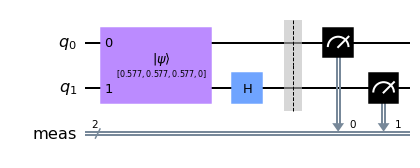

In [6]:
# Alice measures z, Bob measures x

hardy_circuit = QuantumCircuit(2)

hardy_circuit.initialize(np.array([1, 1, 1, 0])/np.sqrt(3))
hardy_circuit.h(1)

hardy_circuit.measure_all()

hardy_circuit.draw(output="mpl")

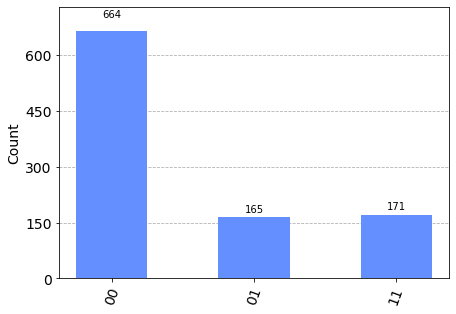

In [7]:
job = simulator.run(hardy_circuit, shots=1000)
result = job.result()
counts = result.get_counts(hardy_circuit)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

/tmp/ipykernel_59/1192045102.py:4: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeParis
/opt/conda/lib/python3.8/site-packages/qiskit_aer/noise/device/models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (78724.73839768364 > 2 * 17977.586136949183). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
/opt/conda/lib/python3.8/site-packages/qiskit_aer/noise/device/models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (151392.40575779957 > 2 * 69749.41874968237). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
/opt/conda

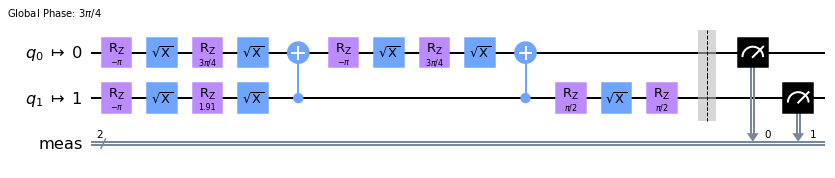

In [8]:
from qiskit import transpile

from qiskit.providers.aer import AerSimulator
from qiskit.test.mock import FakeParis

backend_sim = AerSimulator.from_backend(FakeParis())
transpile(hardy_circuit, backend_sim).draw(output='mpl', idle_wires=False)

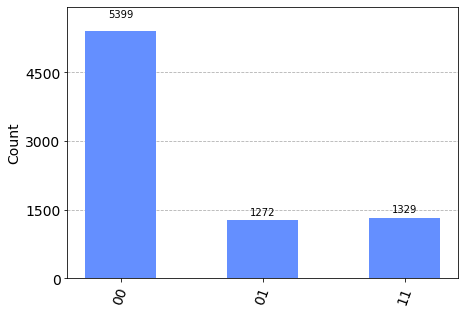

In [9]:
# Running the circuit 

from qiskit.providers.aer import QasmSimulator
simulator = QasmSimulator()

job = simulator.run(hardy_circuit, shots=8000)
result = job.result()
counts = result.get_counts(hardy_circuit)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

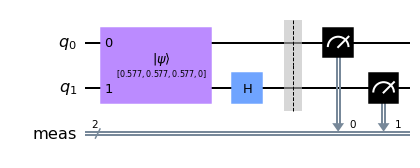

In [10]:
# Alice measures z, Bob measures x

hardy_circuit = QuantumCircuit(2)

hardy_circuit.initialize(np.array([1, 1, 1, 0])/np.sqrt(3))
hardy_circuit.h(1)

hardy_circuit.measure_all()

hardy_circuit.draw(output="mpl")

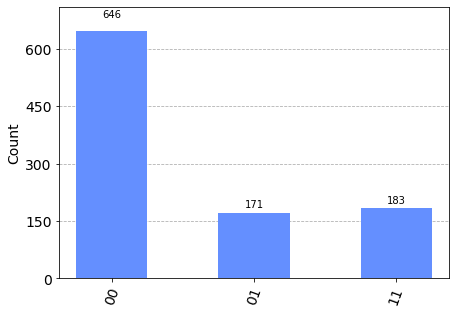

In [11]:
job = simulator.run(hardy_circuit, shots=1000)
result = job.result()
counts = result.get_counts(hardy_circuit)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

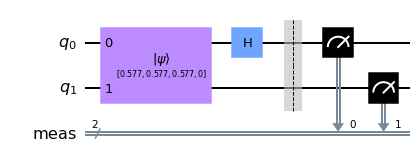

In [12]:
# Alice measures x, Bob measures z

hardy_circuit = QuantumCircuit(2)

hardy_circuit.initialize(np.array([1, 1, 1, 0])/np.sqrt(3))
hardy_circuit.h(0)

hardy_circuit.measure_all()

hardy_circuit.draw(output="mpl")

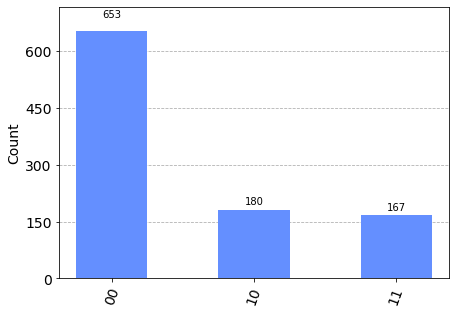

In [13]:
job = simulator.run(hardy_circuit, shots=1000)
result = job.result()
counts = result.get_counts(hardy_circuit)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

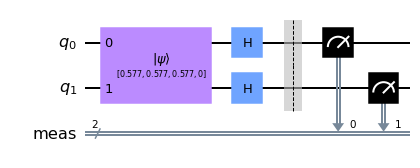

In [14]:
# Alice measures x, Bob measures x

hardy_circuit = QuantumCircuit(2)

hardy_circuit.initialize(np.array([1, 1, 1, 0])/np.sqrt(3))
hardy_circuit.h(0)
hardy_circuit.h(1)

hardy_circuit.measure_all()

hardy_circuit.draw(output="mpl")

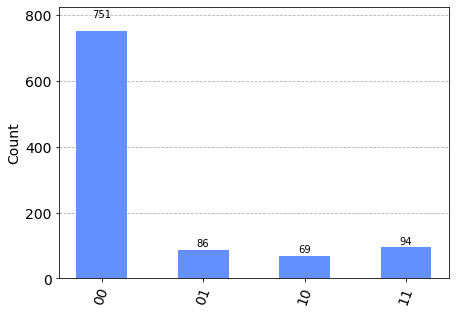

In [15]:
job = simulator.run(hardy_circuit, shots=1000)
result = job.result()
counts = result.get_counts(hardy_circuit)

from qiskit.visualization import plot_histogram
plot_histogram(counts)